<a href="https://colab.research.google.com/github/Abhijith-Nagarajan/PadhAI_Implementations/blob/main/MP_Neuron_Perceptron_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### PadhAI Deep Learning Course ####
As part of the Deep Learning Course, I will be implementing various modules covered in the course to deepen my understanding.

##### Module 1 - MP Neuron #####

<head>
    <h3><b>Properties</b></h3>
</head>
<body>
    <div>
    <table>
        <tr> 
            <th> Data </th>
            <th> Classification Type</th>
            <th> Model </th>
            <th> Loss function </th>
            <th> Learning Algorithm </th>
            <th> Evaluation </th>
        </tr>
        <tr>
            <th> Binary Data </th>
            <th> Binary </th>
            <th> Linear </th>
            <th> y_pred = 1, iff (∑ Xi >= b)<br>
                 y_pred = 0, iff (∑ Xi <  b)<br><br>
            </th>
            <th> Brute Force</th>
            <th> Accuracy </th>
        </tr>
    </table>
    <ul> 
        <li> i ranges from 1 to n </li>
        <li> n = number of features </li>
    </ul>
    </div>
</body>

###### Code Implementation ######

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from sklearn import datasets, model_selection, metrics

In [2]:
features, target = datasets.make_classification(n_samples = 10000, 
                                  n_features = 25, 
                                  n_informative = 25,
                                  n_redundant = 0,
                                  n_repeated = 0,
                                  n_classes = 2)

logging.info('Created a classificationd dataset')

In [3]:
df = pd.DataFrame(features)

In [4]:
df.columns = [f"col_{i}" for i in range(25)]

In [5]:
df['Target'] = target

In [6]:
for col in df.drop('Target',axis=1).columns:
    partition_value = df[col].median()
    df[col] = df[col].apply(lambda row: 0 if row < partition_value else 1)

logging.info('Binarized the input data for MP Neuron data')

In [7]:
df[df.Target==0].sample(10)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,Target
165,0,1,0,0,0,0,1,1,1,0,...,0,1,0,0,1,1,1,0,1,0
2236,0,1,1,0,1,1,0,1,0,1,...,1,1,0,0,1,0,1,0,1,0
6883,1,1,1,1,1,0,0,1,0,0,...,1,0,1,1,0,0,0,0,0,0
1611,0,0,0,0,0,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
2048,0,0,0,0,1,0,1,0,1,1,...,0,0,0,1,0,1,1,1,1,0
7708,1,0,1,0,0,1,1,0,0,1,...,1,0,0,1,1,1,0,0,1,0
9651,1,0,1,1,0,1,1,0,0,1,...,0,1,1,0,0,1,0,0,0,0
3439,1,1,1,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,1,1,0
7364,1,0,0,1,1,1,1,0,0,1,...,0,0,0,1,1,1,0,0,1,0
3606,1,0,0,1,0,0,1,0,1,1,...,1,1,1,1,0,0,1,0,0,0


In [8]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(df.drop('Target',axis=1), df.Target, test_size = 0.3, random_state = 42)

In [9]:
class MPNeuron:
    def compute_loss(self,Y,Y_pred):
        return np.sum((Y-Y_pred)**2)

    def evaluation(self,X,Y,b):
        Y_pred = []
        y_pred_values = X.apply(np.sum,axis=1)
        for pred in y_pred_values:
            if(pred>=b):
                Y_pred.append(1)
            else:
                Y_pred.append(0)
        return self.compute_loss(np.array(Y),np.array(Y_pred))

In [10]:
model = MPNeuron()
logging.info('Initializzed MP Neuron object')

In [11]:
for b in range(0,25):
    print(f'Computing loss for b = {b}')
    model_loss = model.evaluation(X_train,Y_train,b)
    print(f'Loss: {model_loss}')

Computing loss for b = 0
Loss: 3506
Computing loss for b = 1
Loss: 3506
Computing loss for b = 2
Loss: 3506
Computing loss for b = 3
Loss: 3506
Computing loss for b = 4
Loss: 3506
Computing loss for b = 5
Loss: 3509
Computing loss for b = 6
Loss: 3532
Computing loss for b = 7
Loss: 3554
Computing loss for b = 8
Loss: 3582
Computing loss for b = 9
Loss: 3617
Computing loss for b = 10
Loss: 3613
Computing loss for b = 11
Loss: 3545
Computing loss for b = 12
Loss: 3443
Computing loss for b = 13
Loss: 3373
Computing loss for b = 14
Loss: 3309
Computing loss for b = 15
Loss: 3269
Computing loss for b = 16
Loss: 3289
Computing loss for b = 17
Loss: 3354
Computing loss for b = 18
Loss: 3425
Computing loss for b = 19
Loss: 3464
Computing loss for b = 20
Loss: 3484
Computing loss for b = 21
Loss: 3488
Computing loss for b = 22
Loss: 3494
Computing loss for b = 23
Loss: 3494
Computing loss for b = 24
Loss: 3494


##### Module 2 - Perceptron #####

<head>
    <h3><b>Properties</b></h3>
</head>
<body>
    <div>
    <table>
        <tr> 
            <th> Data </th>
            <th> Classification Type</th>
            <th> Model </th>
            <th> Loss function </th>
            <th> Learning Algorithm </th>
            <th> Evaluation </th>
        </tr>
        <tr>
            <th> Real Data </th>
            <th> Binary </th>
            <th> Linear </th>
            <th> y_pred = 1, iff (∑ WiXi >= b)<br>
                 y_pred = 0, iff (∑ WiXi <  b)<br><br>
            </th>
            <th> </th>
            <th> Accuracy </th>
        </tr>
    </table>
    <ul> 
        <li> i ranges from 1 to n </li>
        <li> n = number of features </li>
        <li> W = Weights vector randomly initialized </li>
    </ul>
    </div>
</body>

###### Code Implementation ######

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, metrics

In [ ]:
breast_cancer_data = datasets.load_breast_cancer(as_frame=True)

In [ ]:
df = breast_cancer_data.data
df['Target'] = breast_cancer_data.target

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
numerical_cols = list(df.select_dtypes('float64').columns)

In [ ]:
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric,downcast='float',errors='coerce')

In [ ]:
original_cols = list(df.columns)
original_cols.remove('Target')

In [ ]:
cols = [col.replace(" ","_") for col in df.columns if " " in col and col!='Target'] 

In [ ]:
cols_to_rename = dict(zip(original_cols,cols))

In [ ]:
df = df.rename(columns=cols_to_rename)

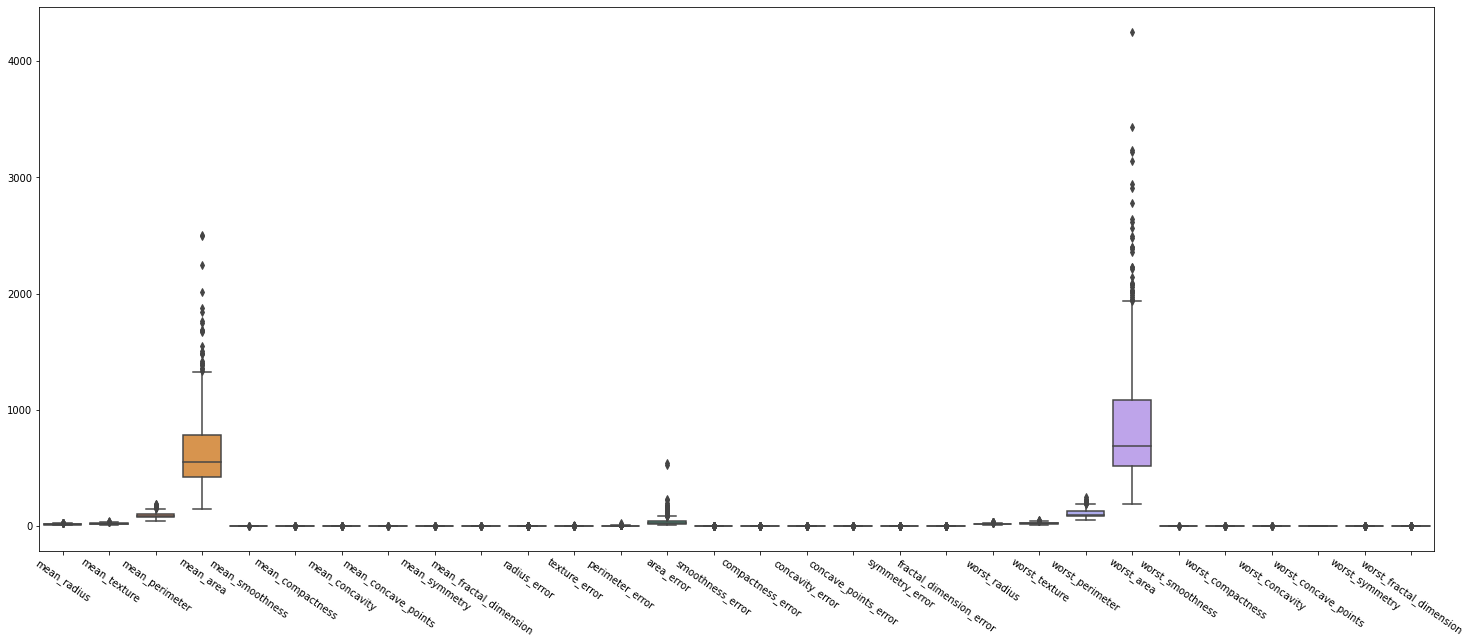

In [ ]:
plt.figure(figsize=(25,10))
sns.boxplot(data=df.drop(['Target'],axis=1))
plt.xticks(rotation=325)
plt.show()

<h4> Since the data for the perceptron model needs to be standardized, the standardization() from sklearn will be used on four columns: <b>mean_area, area_error, worst_perimeter, and worst_area.</b></h4>

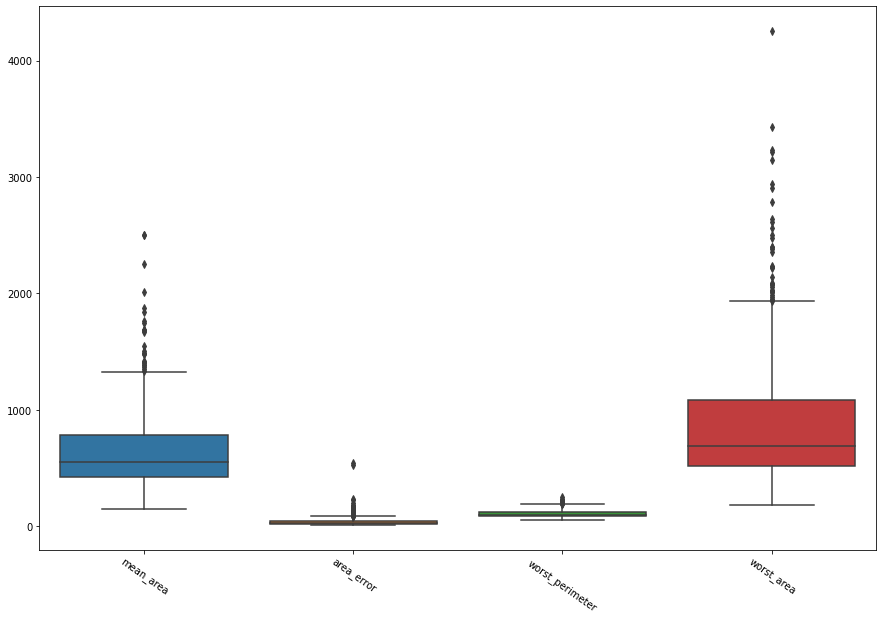

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[['mean_area', 'area_error','worst_perimeter','worst_area']])
plt.xticks(rotation=325)
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(df.drop('Target',axis=1),df.Target,test_Size=0.3,random_state=42)